In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.losses import BinaryCrossentropy


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
  optimizer='adam',
  loss=BinaryCrossentropy(),
  metrics=['accuracy'])

In [4]:
from PIL import Image

The image size is: (150, 150)


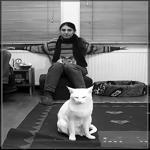

In [5]:
img = Image.open('/kaggle/input/30k-cats-and-dogs-150x150-greyscale/Animal Images/cats/00001098_028.jpg')
img_size = img.size

print("The image size is: {}".format(img_size))

img

In [6]:
batch_size = 30
img_height = 150
img_width = 150

In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/kaggle/input/30k-cats-and-dogs-150x150-greyscale/Animal Images',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 30061 files belonging to 2 classes.
Using 24049 files for training.


In [8]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  '/kaggle/input/30k-cats-and-dogs-150x150-greyscale/Animal Images',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 30061 files belonging to 2 classes.
Using 6012 files for validation.


In [9]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
802/802 [==============================] - 51s 56ms/step - loss: 0.6570 - accuracy: 0.6045 - val_loss: 0.5934 - val_accuracy: 0.6941
Epoch 2/10
802/802 [==============================] - 43s 53ms/step - loss: 0.5748 - accuracy: 0.7073 - val_loss: 0.5294 - val_accuracy: 0.7412
Epoch 3/10
802/802 [==============================] - 43s 53ms/step - loss: 0.5046 - accuracy: 0.7570 - val_loss: 0.4756 - val_accuracy: 0.7710
Epoch 4/10
802/802 [==============================] - 43s 53ms/step - loss: 0.4439 - accuracy: 0.7901 - val_loss: 0.4253 - val_accuracy: 0.8002
Epoch 5/10
802/802 [==============================] - 43s 53ms/step - loss: 0.3886 - accuracy: 0.8227 - val_loss: 0.3923 - val_accuracy: 0.8230
Epoch 6/10
802/802 [==============================] - 43s 53ms/step - loss: 0.3365 - accuracy: 0.8524 - val_loss: 0.3804 - val_accuracy: 0.8312
Epoch 7/10
802/802 [==============================] - 43s 53ms/step - loss: 0.2930 - accuracy: 0.8732 - val_loss: 0.3816 - val_accuracy:

In [10]:
model.save('cat_dog_model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
from tensorflow.keras.preprocessing import image
test_files = ['/kaggle/input/images/cat2.jpg', '/kaggle/input/images/dog.jpg']
for file in test_files:
    img = image.load_img(file, target_size=(150, 150))
    da = image.img_to_array(img)
    da = np.expand_dims(da, axis=0)
    print(model.predict(da))

1/1 [==============================] - 0s 354ms/step
[[0.01865338]]
1/1 [==============================] - 0s 18ms/step
[[0.9997843]]
